# Analysing Movie Ratings on Fandago

According to Hickey's analysis, Fandago has been inflating movie ratings, where the values were significantly rounded up, giving inaccurate ratings. The following 2 datasets were collected before and after this analysis where the bug issue, according to Fandago, was quickly fixed afterwards. 

The initial goal was to observe if there are differences in the Fandago ratings after Hickey's analysis. However, to provide accurate conclusions, datasets subject to temporal trends are not suited to represent this analysis. This leads to the current goal instead which could also act as a proxy for the initial goal:

In this short project, popular movies ratings on Fandago at years 2015 and 2016 will be analysed. The main goal is to determine the differences of Fandago popular movie ratings and whether the difference support Fandago's statement of the issue fixed.

In [6]:
import pandas as pd
pd.options.display.max_columns = 100

before = pd.read_csv('Downloads/fandango_score_comparison.csv')
after = pd.read_csv('Downloads/movie_ratings_16_17.csv')

In [7]:
before.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [8]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [13]:
# isolate related columns to Fandago ratings

fdg_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fdg_after = after[['movie', 'year', 'fandango']].copy()

In [14]:
fdg_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [15]:
fdg_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [17]:
# ensure second dataset is valid, where contains popular movies
# assuming popular movies with 30 fan reviews (same as first dataset, Hickey's benchmark)

sum(fdg_before['Fandango_votes'] < 30)   # only fan reviews above 30 are in the first dataset 

0

In [18]:
fdg_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


According to the titles above and fan review numbers provided (attached in the repository), almost 100% of the movies in the sample have over 30 fan reviews, hence could be labelled as popular.

In [22]:
# isolating the first dataset, leaving movies released in 2015

fdg_before['Year'] = fdg_before['FILM'].str[-5:-1]
fdg_2015 = fdg_before[fdg_before['Year'] == '2015'].copy()   
fdg_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [25]:
# isolating the second dataset, leaving movies released in 2016

fdg_2016 = fdg_after[fdg_after['year'] == 2016].copy()   
fdg_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

### Comparing Distribution Shapes for 2015 and 2016 (using the FTE style)

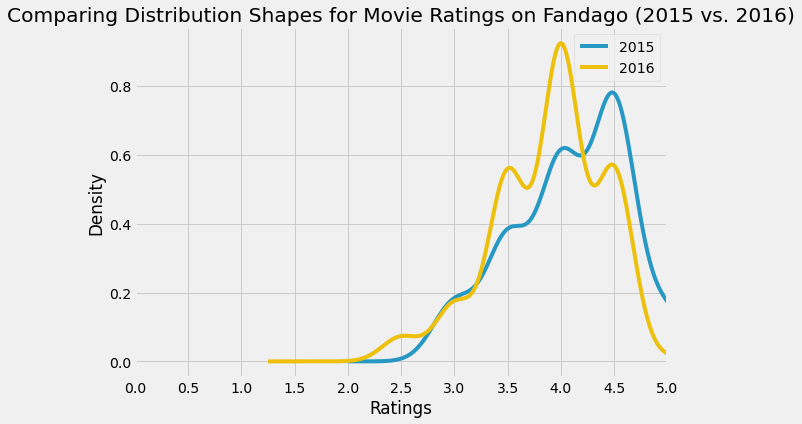

In [48]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

# plotting kernel density plots
fdg_2015['Fandango_Stars'].plot.kde(label = '2015', color = '#2798c4', legend = True, figsize = (8.5,6))
fdg_2016['fandango'].plot.kde(label = '2016', color = '#edc00c', legend = True)

plt.xlim(0,5)   # ratings
plt.xlabel('Ratings')
plt.xticks(arange(0, 5.1, 0.5))
plt.title('Comparing Distribution Shapes for Movie Ratings on Fandago (2015 vs. 2016)', y = 1.0)
plt.show()

### Observations from distribution shapes:

1. Both distributions are heavily skewed to the right, where 2015 slightly more.
2. The 2015 distribution shows a higher concentration at ratings at the 4.0 to 4.5 range, whereas the 2016 distribution has a wider and even spread with a peak at around 4.0.
3. The density for 2016 shows fewer very high ratings (above 4.5) compared to 2015, where ratings around 4.5 were highly common.

These observations show that popular movie ratings in 2016 is generally lower than in 2015, suggesting that there are differences in Fandango's popular movie ratings in 2015 and 2016, where the ratings were less inflated in 2016 compared to 2015.

###  Understand Ratings Better by Comparing Relative Frequencies

In [40]:
print('2015' + '\n')   # ratings in 2015
fdg_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015



3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [41]:
print('2016' + '\n')   # ratings in 2016
fdg_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016



2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

### Observations from relative frequencies

1. In 2015, very high ratings (4.5 and 5.0) take up about 45% overall, whereas this percentage is significantlly lower in 2016 (about 25%). 
2. 0.5% of the ratings are at 5.0 in 2016, which is about 6.5% lower than that in 2015. 
2. The highest rating in 2015 is 4.5 with nearly 38%, much popular than that in 2016 with 24.6%.
3. In 2016, the percentages in 3.5 and 4.0 increased from the previous year, 24% and 40.3% respectively.  

### Calculating the Direction of the Change

In [45]:
mean_2015 = fdg_2015['Fandango_Stars'].mean()   # calculating mean
mean_2016 = fdg_2016['fandango'].mean()

median_2015 = fdg_2015['Fandango_Stars'].median()   # calculating median
median_2016 = fdg_2016['fandango'].median()

mode_2015 = fdg_2015['Fandango_Stars'].mode()[0] # calculating mode
mode_2016 = fdg_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']

summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


### Plotting Mean, Median, Mode Values (FTE Style)

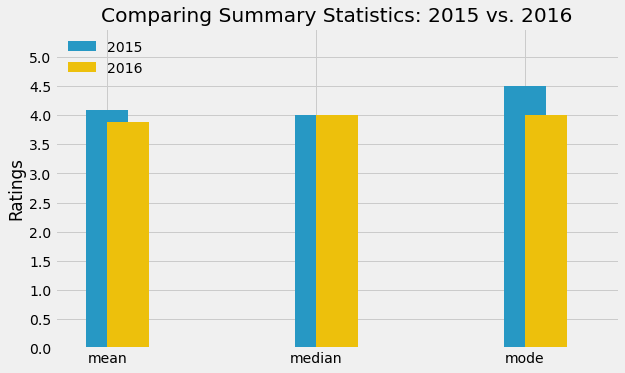

In [54]:
plt.style.use('fivethirtyeight')

# plotting bar graphs
summary['2015'].plot.bar(color = '#2798c4', align = 'center', label = '2015', width = .2)
summary['2016'].plot.bar(color = '#edc00c', align = 'edge', label = '2016', width = .2,
                         rot = 0, figsize = (9,5.5))

plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Ratings')
plt.legend(framealpha = 0, loc = 'upper left')
plt.title('Comparing Summary Statistics: 2015 vs. 2016', y = 1)
plt.show()

In [55]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]   # mean differnece in percentage

0.04842683568951993

From the bar graphs, the mean rating is indeed lower in 2016 by about 0.2 compared to that in 2015, a near 5% rating drop from 2015 to 2016. Median values remain the same for both years, though a decrease of 0.5 is observed in the mode graphs.

Taking this and the kernel density plots above into account, it can be confirmed that in general, popular movie ratings in 2016 were indeed lowered than those released in 2015.

### Conclusion

From the above analysis, it is confirmed that the popular movie ratings on Fandago in 2016 are indeed different as compared to the ratings in 2015, where on average, the movies released in 2016 have slightly lower ratings on Fandago than those released in 2015. 

Though not completely certain, this can highly be due to Fandago did in fact fixed the biasing and aggregation in the rating system after Hickey's analysis.